In [133]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [134]:
df = pd.read_csv("Cleaned-HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6


In [135]:
# Make sure df and numeric_data are from the same source and have the same length
numeric_data = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [136]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try different cluster counts and calculate silhouette scores
sil_scores = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(scaled_data)
    score = silhouette_score(scaled_data, model.labels_, metric='euclidean')
    sil_scores.append(score)

silhouette_df = pd.DataFrame({'K': list(K), 'Silhouette Score': sil_scores})
display(silhouette_df)

,K,Silhouette Score
0,2,0.122836
1,3,0.087176
2,4,0.087322
3,5,0.082852
4,6,0.065878
5,7,0.053958
6,8,0.054368
7,9,0.048979
8,10,0.053660


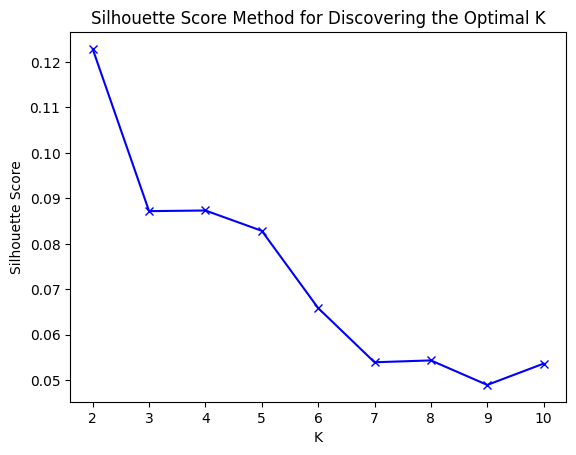

In [137]:
# Plot the silhouette scores to find the optimal k
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(list(K), sil_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [138]:
# Select the best number of clusters
best_k = list(K)[sil_scores.index(max(sil_scores))]
print(f"Best number of clusters: {best_k} with silhouette score: {max(sil_scores):.4f}")

# Fit KMeans with the best k and assign cluster labels
final_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(scaled_data)

Best number of clusters: 2 with silhouette score: 0.1228


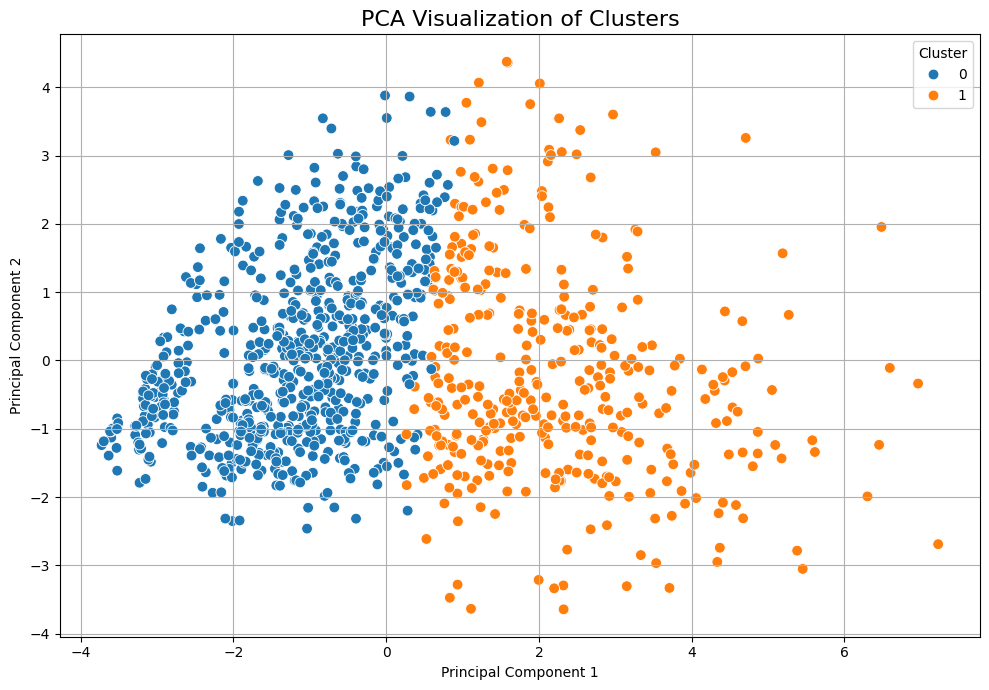

In [139]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [140]:
# Show mean values of features by cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)

# Transpose for easier comparison (features as rows)
cluster_profile.T


Cluster,0,1
Age,33.221906,37.541779
DailyRate,793.796586,820.043127
DistanceFromHome,8.854908,9.849057
Education,2.792319,2.935310
EmployeeNumber,1025.527738,1049.652291
EnvironmentSatisfaction,2.691323,2.770889
HourlyRate,67.156472,64.843666
JobInvolvement,2.718350,2.738544
JobLevel,1.364154,2.215633
JobSatisfaction,2.677098,2.843666


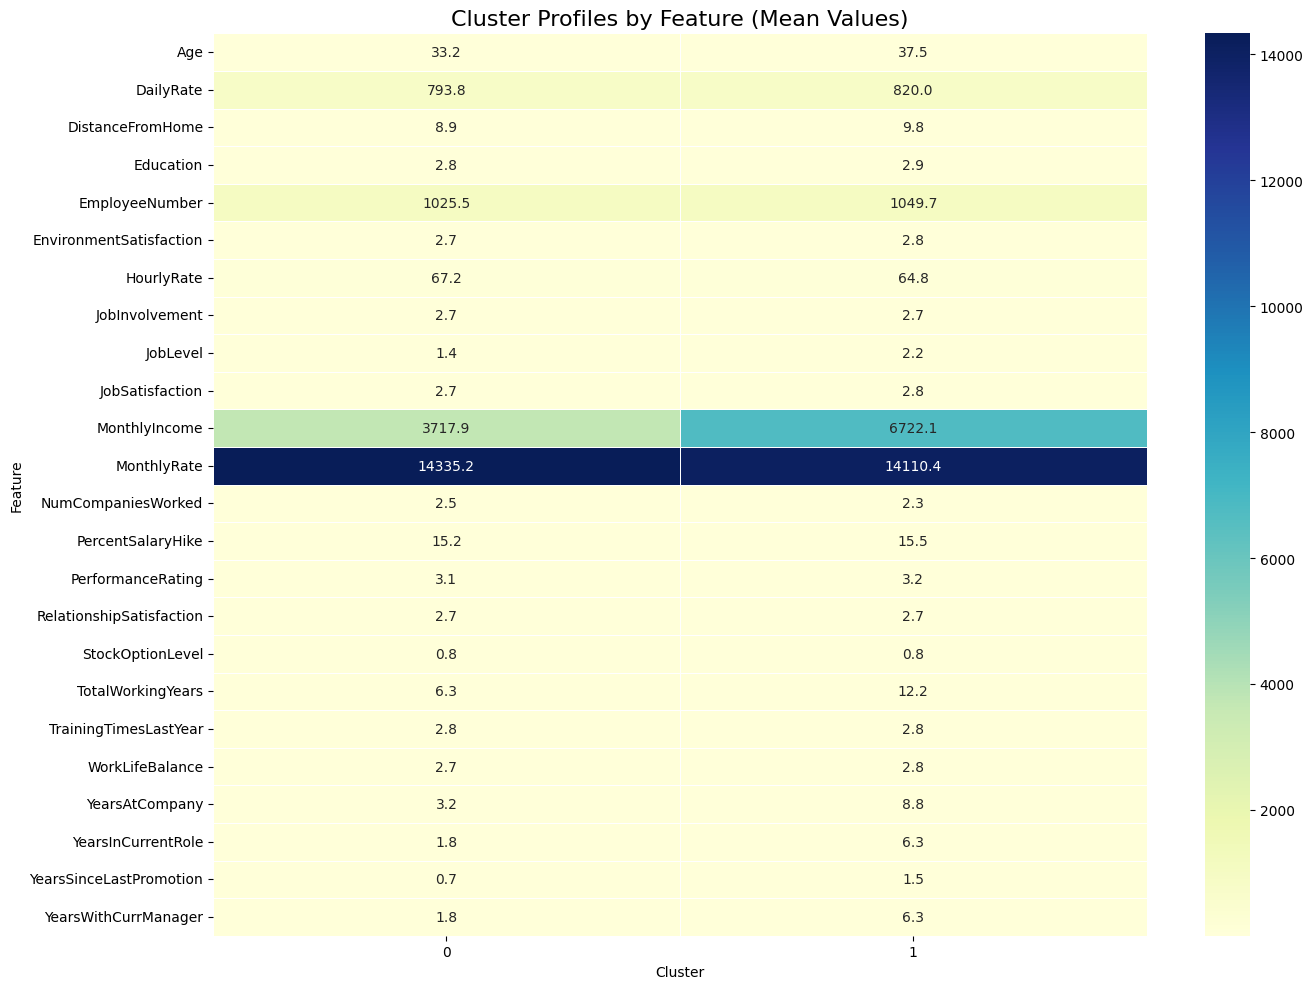

In [141]:
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_profile.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Cluster Profiles by Feature (Mean Values)", fontsize=16)
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
